# Initializing

In [1]:
#Active environment should be aws_env
!conda info | grep 'active env'

     active environment : aws_env
    active env location : /home/hassan101/anaconda3/envs/aws_env


In [2]:
#Get AWS credentials from environment
import os
aws_akid = os.environ['AWS_KID']
aws_sak = os.environ['AWS_AK']

import boto3
client = boto3.client('iam', aws_access_key_id=aws_akid, aws_secret_access_key= aws_sak)
users = client.list_users()
for key in users['Users']:
    print('Active User:', key['UserName'])

Active User: usr_hassan


In [3]:
#Importing libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

# Getting train and test splits locally

In [4]:
Xy_train = pd.read_csv('Xy_train.csv', index_col=0)
Xy_test = pd.read_csv('Xy_test.csv', index_col=0)

X_train = Xy_train.iloc[:,:-1]
X_test = Xy_test.iloc[:,:-1]

y_train = Xy_train.iloc[:,[-1]]
y_test = Xy_test.iloc[:,[-1]]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 20)
(4930, 1)
(2113, 20)
(2113, 1)


In [5]:
#Get names of numerical and categorical columns
from pandas.api.types import is_object_dtype, is_numeric_dtype, is_bool_dtype

num_col = []
cat_col = []

#Scanning all feature columns in X_train
for col in X_train.columns: 
    if is_object_dtype(X_train[col]):
        cat_col.append(col)
    else:
        num_col.append(col)

print('Num Col:',num_col)
print('Cat Col:', cat_col)

Num Col: ['tenure', 'monthlycharges', 'totalcharges']
Cat Col: ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [6]:
#Removing customer id from cat_col
cat_col.remove('customerid')
cat_col

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

# Featurizing

In [7]:
#We will use dic vectorizer for OHE
from sklearn.feature_extraction import DictVectorizer

X_train_dicts = X_train[cat_col + num_col].to_dict(orient='records') #orient=records ensures records are based on rows not columns

This created a list of dictionary for X_train dataset, with each row of dataset as a dictioary in the list. This is how the first row in dictionary list looks like:

In [8]:
X_train_dicts[0]

{'gender': 'male',
 'seniorcitizen': 'no',
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 20,
 'monthlycharges': 68.7,
 'totalcharges': 1416.2}

Now we will create dictionary vectorizer. The `sparse=True` argument will produce sparse matrix in sparse row format (special way of encoding data when there are many zeros - may work well when there are too many distinct values)

In [9]:
dv = DictVectorizer(sparse=False)
dv.fit(X_train_dicts)
Xohe_train_array = dv.transform(X_train_dicts)

display(Xohe_train_array[0])
display(dv.get_feature_names_out())
display(Xohe_train_array.shape)

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 6.8700e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+01,
       1.4162e+03])

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen=no',
       'seniorcitizen=yes', 'streamingmovies=no',
       'stream

(4930, 46)

Now do the same for validation data

In [10]:
X_test_dicts = X_test[cat_col + num_col].to_dict(orient='records')
Xohe_test_array = dv.transform(X_test_dicts)
Xohe_test_array.shape

(2113, 46)

# Training via pipelienes

In [ ]:
#Setup MLDev pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

mldev_pipeline = {
    'logreg': make_pipeline(StandardScaler(), LogisticRegression()),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

for model_name, pipeline in mldev_pipeline.items():
    print(model_name)
    print(pipeline)

In [ ]:
#These can also be viewed visually
mldev_pipeline['logreg']

In [ ]:
#Check the parameters for these models
print('LinReg Params:',LogisticRegression().get_params())
print('RF Params:',RandomForestClassifier().get_params())
print('GB Params:',GradientBoostingClassifier().get_params())

In [ ]:
#Create a grid for hyperparameters tuning
hpgrid = {

    'logreg':{
    },
    
    'rf':{
        'randomforestclassifier__n_estimators':[100, 200, 300],
        'randomforestclassifier__max_depth':[5, 10, 'None']
    },

    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300],
        'gradientboostingclassifier__learning_rate':[0.1, 0.2],
    }
}

In [ ]:
#Training the models by looping across pipeline
from sklearn.model_selection import GridSearchCV

trained_models = {}
for model_name, pipeline in mldev_pipeline.items():
    #Train using CV class
    print(f'Training model: {model_name}')
    model = GridSearchCV(pipeline, hpgrid[model_name], n_jobs = -1, cv = 10) #n_jobs = -1 will use all processors for parallel computing
    model.fit(Xohe_train_array, y_train.values.ravel())
    trained_models[model_name] = model

trained_models

In [ ]:
# Check metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

for model_name, model in trained_models.items():
    
    y_hat = model.predict_proba(Xohe_test_array)[:,1]
    #Converting to 1/0 based on threshold of 0.5
    y_hat = (y_hat >=0.5).astype(int)
    print(f'\nMetrics for {model_name}:',
    'Accuracy=', accuracy_score(y_test, y_hat),
    'Precision=', precision_score(y_test,y_hat),
    'Recall=', recall_score(y_test,y_hat),
    'AUC=', roc_auc_score(y_test,y_hat),
    'Confusion matrix=', confusion_matrix(y_test,y_hat)   
    )

In [ ]:
#Checking parameters for the best model
best_model = trained_models['logreg']
display(best_model.get_params())

In [ ]:
#Checking parameters for the best estimator of that model
best_estimator = best_model.best_estimator_ #This will give a pipeline. To select an estimator you need to specify it as dictionary value.
best_estimator['logisticregression'].get_params()

Check model coefficients associated with best estimator of logistic regression

In [ ]:
display(best_estimator['logisticregression'].coef_)
display(best_estimator['logisticregression'].intercept_)

In [ ]:
# Lets check probability induced by bias
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
print(sigmoid(best_estimator['logisticregression'].intercept_))

This equates to 16%. This means that the model is 16% biased towards predictions without even looking at customer. This should be as low as possible.

In [ ]:
# Saving best model
import pickle
with open('bestmodel.pkl', 'wb') as f:
    pickle.dump(trained_models['logreg'], f)

In [ ]:
#If we need to reload the model in future, we can use this code
with open('bestmodel.pkl', 'rb') as f:
    reloaded_model = pickle.load(f)

reloaded_model

Once we know what model suits best for the data based on gridsearchCV method, we can train it from scratch later.

# Training from scratch

In [11]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xohe_train_array)

StandardScaler()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

#With scaling
logreg.fit(scaler.transform(Xohe_train_array), y_train.values.ravel())
scores = cross_val_score(logreg, scaler.transform(Xohe_train_array), y_train.values.ravel(), cv=10)

scores

array([0.79107505, 0.79716024, 0.80324544, 0.77890467, 0.81541582,
       0.82352941, 0.80324544, 0.80933063, 0.77687627, 0.81744422])

In [14]:
# Check metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

y_hat = logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1]
#Converting to 1/0 based on threshold of 0.5
y_hat = (y_hat >=0.5).astype(int)

print(
'Accuracy=', accuracy_score(y_test, y_hat),
'\nPrecision=', precision_score(y_test,y_hat),
'\nRecall=', recall_score(y_test,y_hat),
'\nAUC=', roc_auc_score(y_test,y_hat),
'\nConfusion matrix=', confusion_matrix(y_test,y_hat)   
)


Accuracy= 0.8088026502602934 
Precision= 0.6255060728744939 
Recall= 0.5852272727272727 
AUC= 0.7342540149125323 
Confusion matrix= [[1400  185]
 [ 219  309]]


In above, the predictions are converted to either 0 or 1 based on a threshold of 0.5 (anything equal or above 0.5 is changed to 1 otherwise 0). Instead of using 0.5, we can check the model with different thresholds between 0 and 1 to see if that helps with accuracy. 

0.00 0.250
0.05 0.509
0.10 0.622
0.15 0.674
0.20 0.713
0.25 0.742
0.30 0.762
0.35 0.776
0.40 0.793
0.45 0.803
0.50 0.809
0.55 0.818
0.60 0.808
0.65 0.808
0.70 0.788
0.75 0.770
0.80 0.758
0.85 0.751
0.90 0.750
0.95 0.750
1.00 0.750


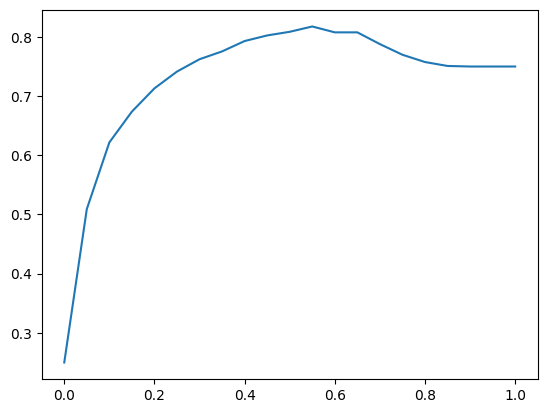

In [27]:
import numpy as np
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    y_hat = logreg.predict_proba(scaler.transform(Xohe_test_array))[:,1]
    y_hat = (y_hat >=t).astype(int)
    acc = accuracy_score(y_test, y_hat)
    scores.append(acc)
    print('%.2f %.3f' % (t, acc))

plt.plot(thresholds, scores)

It seems the optimal region is between 0.45-0.65.

An interesting observation is for threshold of 1 the accuracy is 75%. This means that if model predicts every customer to be NOT churning, it will still give 75% accuracy. This is because we have more customers not churning in our test dataset compared to customers churning.

In [57]:
display(y_test.value_counts())
print(f'Actual NONchurning users in test set: {(y_test.churn.value_counts(normalize=True) * 100)[0] :.0f} %' )
print(f'Actual churning users in test set: {(y_test.churn.value_counts(normalize=True) * 100)[1] :.0f} %' )

churn
0        1585
1         528
dtype: int64

Actual NONchurning users in test set: 75 %
Actual churning users in test set: 25 %


The best accuracy is around 81% at around 0.5 threshold. This means there is only 6% increase in accuracy compared to model which predicts every customer as nonchurning (threshold of 1). So accuracy alone is not the best parameters to assess the model.

This suggests we have class imbalance problem. Will deal with this later. For now, we keep the model.

In [15]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
#Testing random sample prediction from test set
sample_no = 5

display(X_test_dicts[sample_no])
print('Predicted churn prob:', logreg.predict_proba(scaler.transform(dv.transform(X_test_dicts[sample_no])))[:,1])
print('Actual churn:', y_test.iloc[sample_no].values)

{'gender': 'male',
 'seniorcitizen': 'no',
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 67,
 'monthlycharges': 88.4,
 'totalcharges': 5798.3}

Predicted churn prob: [0.13085403]
Actual churn: [0]


In [17]:
# Saving model
import pickle
#with open('model_fromscratch.pkl', 'wb') as f:
#    pickle.dump(rfreg, f)

pickle.dump(logreg, open('model_fromscratch.pkl', 'wb'))

In [18]:
# Saving standardization params
pickle.dump(scaler, open('scaling.pkl','wb'))

# Plotting the predictions

In [ ]:
#Plotting parity plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_hat)
plt.plot(y_test,y_test,'k-') 
plt.xlabel('True Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

In [ ]:
#Plotting residuals
import seaborn as sns

residuals = y_test.values.ravel() - y_hat
sns.displot(residuals, kind = 'kde')
plt.xlabel('Residuals')

In [ ]:
# Plotting scatter plot for residuals and predictions
plt.scatter(y_hat, residuals)
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')